In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile


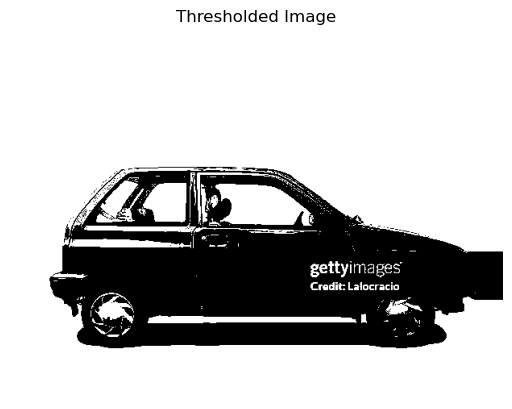

In [2]:
# Load the image
img = cv2.imread("auto.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
ret, th = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Display inside the notebook using matplotlib
plt.imshow(th, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()



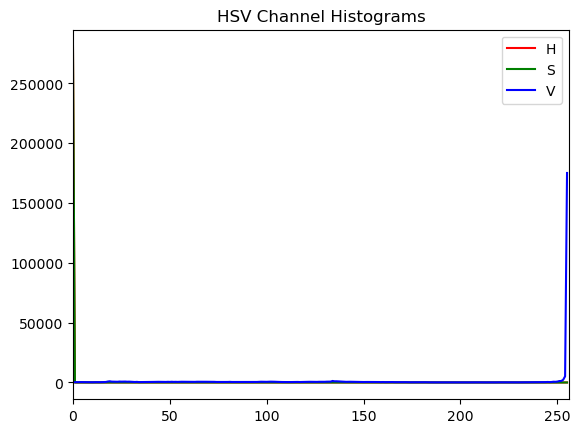

In [3]:
# Load the image
img2 = cv2.imread("auto.jpg")

# Convert from RGB to HSV
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

# Curve colors (red, green, blue)
colors = ('r', 'g', 'b')

# Labels for HSV channels
labels = ('H', 'S', 'V')

# Loop through HSV channels
for i, col in enumerate(colors):
    # Compute histogram for channel i
    hist = cv2.calcHist([hsv], [i], None, [256], [0, 256])
    
    # Plot the histogram
    plt.plot(hist, color=col, label=labels[i])
    plt.xlim([0, 256])

# Show the plot
plt.title("HSV Channel Histograms")
plt.legend()
plt.show()


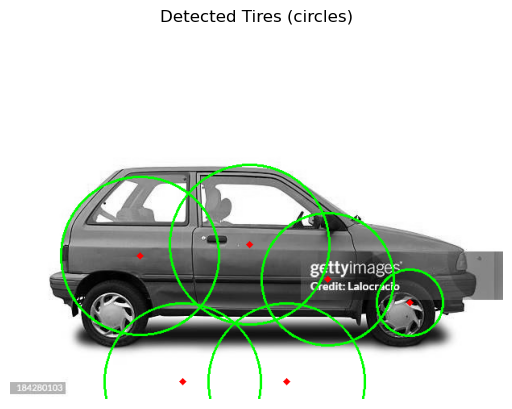

In [4]:
# Load the image
img3 = cv2.imread('auto.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# Apply median blur to reduce noise
gray = cv2.medianBlur(gray, 5)

# Detect circles using Hough Transform
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=100,
    param1=100,
    param2=30,
    minRadius=20,
    maxRadius=100
)


# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img3, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the circle center
        cv2.circle(img3, (i[0], i[1]), 2, (0, 0, 255), 3)

# Display the result 
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title("Detected Tires (circles)")
plt.axis('off')
plt.show()


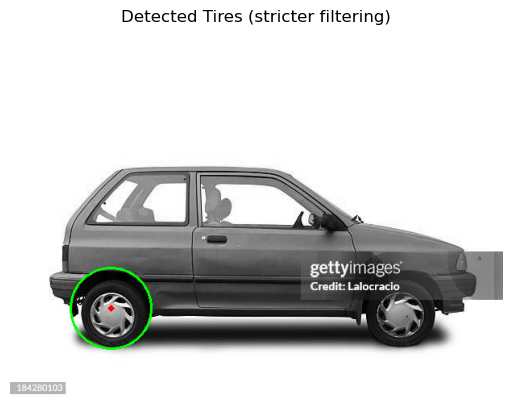

In [5]:
# Load the image
img4 = cv2.imread("auto.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

# Apply median blur to reduce noise while keeping edges
gray = cv2.medianBlur(gray, 5)

# Detect circles using stricter Hough parameters
# Increasing param2 makes the detection more selective (fewer false circles)
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=100,
    param1=100,
    param2=50,        # Higher threshold → stricter detection
    minRadius=30,     # Expected minimum tire radius (pixels)
    maxRadius=60      # Expected maximum tire radius (pixels)
)

# Draw detected circles if any were found
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img4, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the circle center
        cv2.circle(img4, (i[0], i[1]), 2, (0, 0, 255), 3)

# Display result using matplotlib (RGB expected)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title("Detected Tires (stricter filtering)")
plt.axis("off")
plt.show()


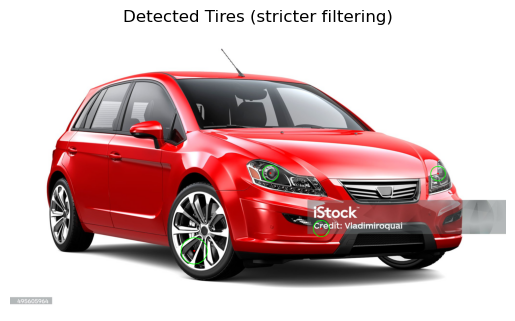

In [6]:
# Load the image
img5 = cv2.imread("auto2.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

# Apply median blur to reduce noise while preserving edges
gray = cv2.medianBlur(gray, 5)

# Detect circles using stricter Hough parameters
# A higher param2 value makes the detection more selective (fewer false positives)
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=100,
    param1=100,
    param2=50,        # Stronger detection threshold
    minRadius=30,     # Expected minimum tire radius (in pixels)
    maxRadius=60      # Expected maximum tire radius (in pixels)
)


# Draw detected circles on the image
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(img5, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the circle center
        cv2.circle(img5, (i[0], i[1]), 2, (0, 0, 255), 3)

# Display the result with matplotlib (converted to RGB)
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.title("Detected Tires (stricter filtering)")
plt.axis('off')
plt.show()


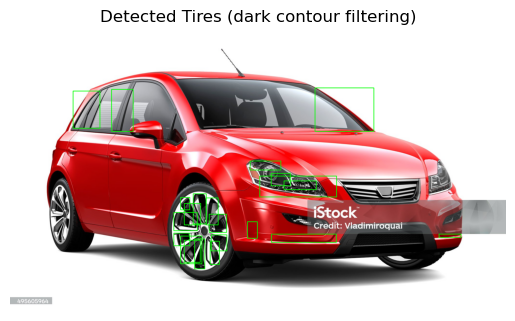

In [7]:
# Load the image
img6 = cv2.imread('auto2.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img6, cv2.COLOR_BGR2GRAY)

# Create a mask by thresholding dark regions (inverse threshold)
_, mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

# Find contours on the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area (to keep only tire-sized objects)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if 500 < area < 5000:   # adjust these values depending on the image
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img6, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))
plt.title("Detected Tires (dark contour filtering)")
plt.axis('off')
plt.show()


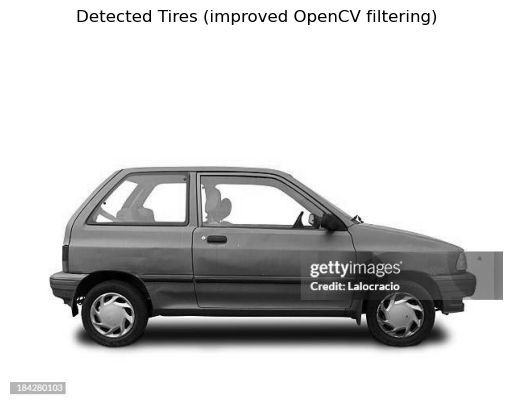

In [8]:
# Load the image
img7 = cv2.imread('auto.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img7, cv2.COLOR_BGR2GRAY)

# Step 1: Create a mask of dark regions (tires are dark areas)
_, dark_mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

# Step 2: Apply morphological closing to clean the mask
kernel = np.ones((5, 5), np.uint8)
clean_mask = cv2.morphologyEx(dark_mask, cv2.MORPH_CLOSE, kernel)

# Step 3: Extract contours from the cleaned mask
contours, _ = cv2.findContours(clean_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

h, w = img7.shape[:2]

for cnt in contours:
    area = cv2.contourArea(cnt)
    x, y, cw, ch = cv2.boundingRect(cnt)

    # Conditions typically matching a tire
    is_low = y > h * 0.5                 # tire located in the lower part of the image
    is_wheel_shape = 0.8 < cw / ch < 1.2 # roughly square (wheel seen from front)
    is_reasonable_size = 300 < area < 5000  # area constraint (adjust depending on image)

    if is_low and is_wheel_shape and is_reasonable_size:
        cv2.rectangle(img7, (x, y), (x + cw, y + ch), (0, 255, 0), 2)

# Display the final result
plt.imshow(cv2.cvtColor(img7, cv2.COLOR_BGR2RGB))
plt.title("Detected Tires (improved OpenCV filtering)")
plt.axis('off')
plt.show()


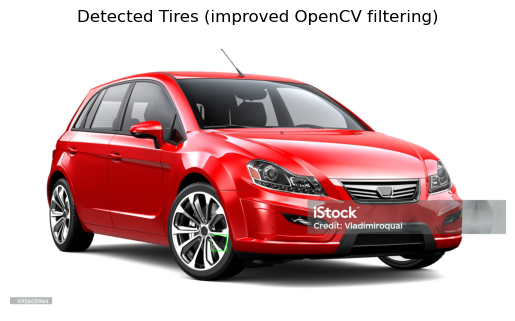

In [9]:
# Load the image
img8 = cv2.imread('auto2.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img8, cv2.COLOR_BGR2GRAY)

# Step 1: Create a mask of dark regions (tires are dark areas)
_, dark_mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

# Step 2: Apply morphological closing to clean the mask
kernel = np.ones((5, 5), np.uint8)
clean_mask = cv2.morphologyEx(dark_mask, cv2.MORPH_CLOSE, kernel)

# Step 3: Extract contours from the cleaned mask
contours, _ = cv2.findContours(clean_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

h, w = img8.shape[:2]

for cnt in contours:
    area = cv2.contourArea(cnt)
    x, y, cw, ch = cv2.boundingRect(cnt)

    # Conditions typically matching a tire
    is_low = y > h * 0.5                  # located in the lower part of the image
    is_wheel_shape = 0.8 < cw / ch < 1.2  # roughly square (wheel seen from front)
    is_reasonable_size = 300 < area < 5000  # contour area range (adjust if needed)

    if is_low and is_wheel_shape and is_reasonable_size:
        cv2.rectangle(img8, (x, y), (x + cw, y + ch), (0, 255, 0), 2)

# Display the final result
plt.imshow(cv2.cvtColor(img8, cv2.COLOR_BGR2RGB))
plt.title("Detected Tires (improved OpenCV filtering)")
plt.axis('off')
plt.show()


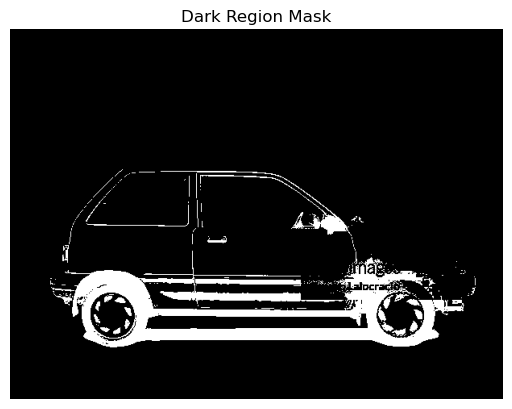

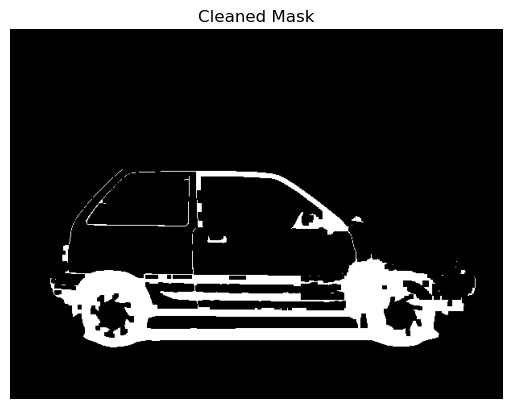

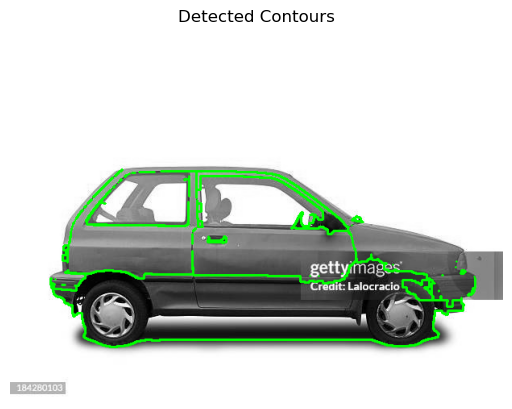

Contours found: 53
Extracted tires: 0
No tires detected.


In [10]:
# Load the image
img9 = cv2.imread('auto.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img9, cv2.COLOR_BGR2GRAY)

# Step 1: Create a mask of dark regions (tires are dark objects)
_, dark_mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

# Display the dark-region mask
plt.imshow(dark_mask, cmap='gray')
plt.title("Dark Region Mask")
plt.axis('off')
plt.show()

# Step 2: Clean the mask using morphological closing
kernel = np.ones((5, 5), np.uint8)
clean_mask = cv2.morphologyEx(dark_mask, cv2.MORPH_CLOSE, kernel)

# Display the cleaned mask
plt.imshow(clean_mask, cmap='gray')
plt.title("Cleaned Mask")
plt.axis('off')
plt.show()

# Step 3: Find contours on the cleaned mask
contours, _ = cv2.findContours(clean_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img9, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img9, cv2.COLOR_BGR2RGB))
plt.title("Detected Contours")
plt.axis('off')
plt.show()

# Step 4: Extract valid tire regions based on shape and position
h_img, w_img = img9.shape[:2]
pneus = []

print("Contours found:", len(contours))

for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    x, y, w, h = cv2.boundingRect(cnt)

    # Conditions typically corresponding to a tire
    is_low = y > h_img * 0.5             # tire should be in the lower half of the image
    is_wheel_shape = 0.8 < w / h < 1.2   # roughly square bounding box
    is_reasonable_size = 300 < area < 5000  # filter out noise

    if is_low and is_wheel_shape and is_reasonable_size:
        roi = img9[y:y+h, x:x+w]
        pneus.append(roi)
        cv2.imwrite(f"pneu_{len(pneus)}.jpg", roi)  # save extracted tire

print("Extracted tires:", len(pneus))

# Step 5: Display extracted tires
if pneus:
    cols = 2
    rows = (len(pneus) + 1) // cols
    plt.figure(figsize=(8, 4 * rows))

    for i, tire in enumerate(pneus):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(tire, cv2.COLOR_BGR2RGB))
        plt.title(f"Tire {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No tires detected.")


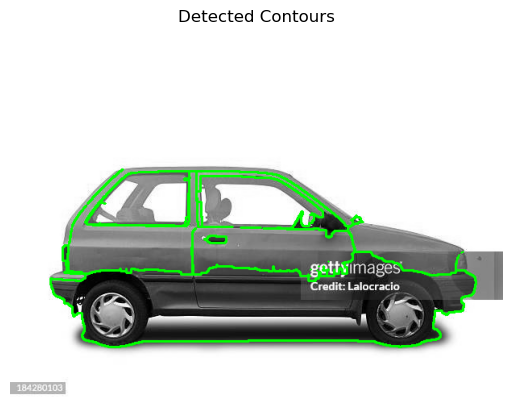

Contours found: 17
Detected tires: 0


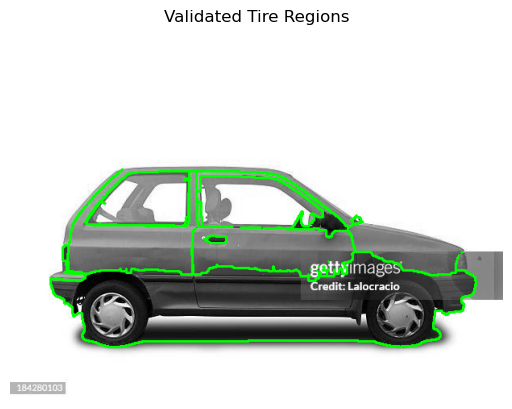

No tires detected.


In [11]:
# Load and preprocess the image
img10 = cv2.imread('auto.jpg')
gray = cv2.cvtColor(img10, cv2.COLOR_BGR2GRAY)

# Create a mask by thresholding dark regions (tires appear as dark areas)
_, dark_mask = cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY_INV)

# Clean the mask using morphological closing
kernel = np.ones((5, 5), np.uint8)
clean_mask = cv2.morphologyEx(dark_mask, cv2.MORPH_CLOSE, kernel)

# Extract contours from the cleaned mask
contours, _ = cv2.findContours(clean_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img10, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img10, cv2.COLOR_BGR2RGB))
plt.title("Detected Contours")
plt.axis('off')
plt.show()

# Analyze contours to identify tire candidates
h_img, w_img = img10.shape[:2]
pneus = []

print("Contours found:", len(contours))

for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    x, y, w, h = cv2.boundingRect(cnt)

    # Tire-like contour conditions (wider ranges to be more permissive)
    is_low = y > h_img * 0.4            # object located in lower half of image
    is_wheel_shape = 0.6 < w / h < 1.4  # bounding box roughly square
    is_reasonable_size = 100 < area < 10000  # filter very small/large contours

    if is_low and is_wheel_shape and is_reasonable_size:
        roi = img10[y:y+h, x:x+w]
        pneus.append(roi)
        cv2.rectangle(img10, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.imwrite(f"pneu_{len(pneus)}.jpg", roi)  # Save extracted region

print("Detected tires:", len(pneus))

# Display image with validated tire regions
plt.imshow(cv2.cvtColor(img10, cv2.COLOR_BGR2RGB))
plt.title("Validated Tire Regions")
plt.axis('off')
plt.show()

# Display extracted tire patches
if pneus:
    cols = 2
    rows = (len(pneus) + 1) // cols
    plt.figure(figsize=(8, 4 * rows))

    for i, pneu in enumerate(pneus):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(pneu, cv2.COLOR_BGR2RGB))
        plt.title(f"Tire {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No tires detected.")


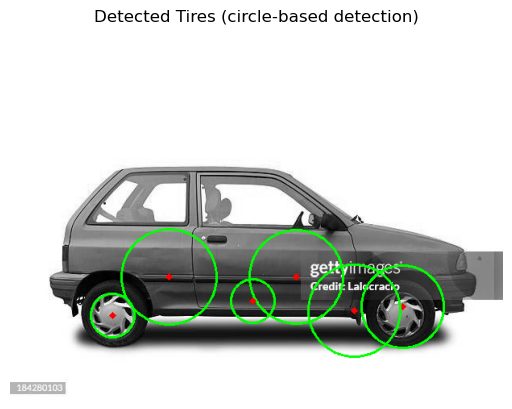

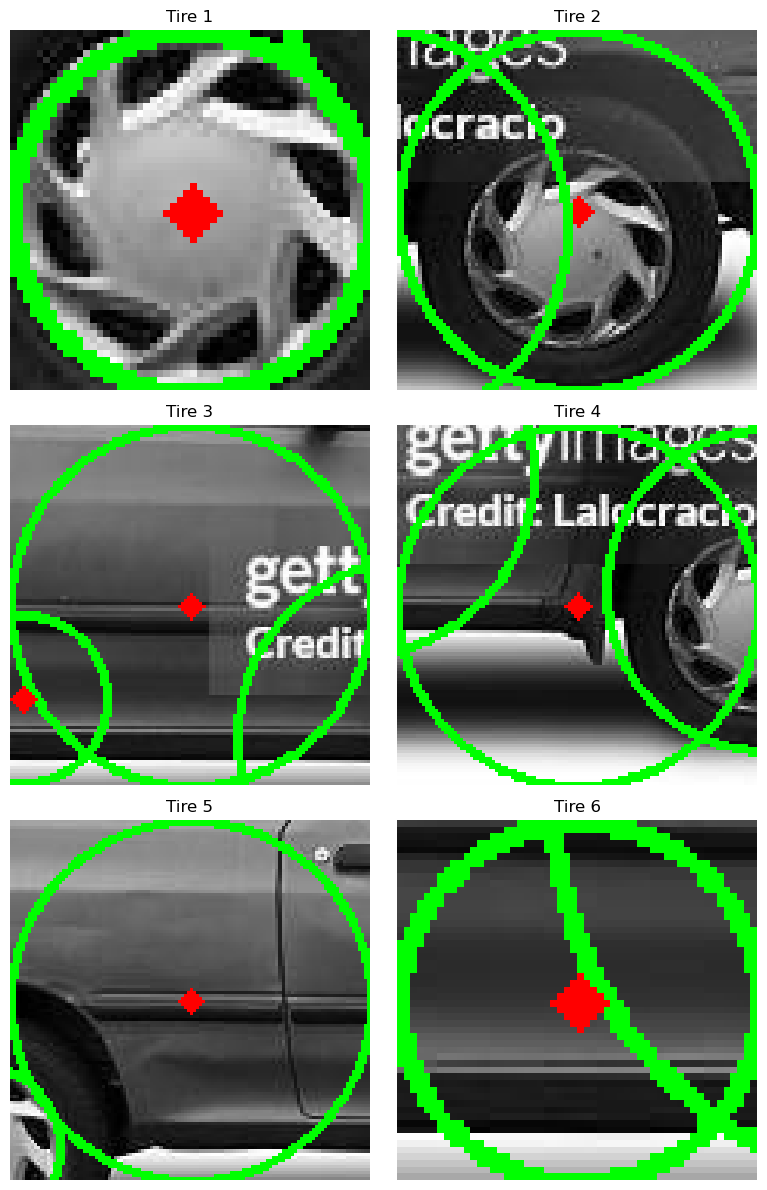

In [12]:
# Load the image
img11 = cv2.imread('auto.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img11, cv2.COLOR_BGR2GRAY)

# Apply median blur to smooth the image and reduce noise
gray_blurred = cv2.medianBlur(gray, 5)

# Detect circles using HoughCircles
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=50,
    param1=100,
    param2=30,
    minRadius=20,
    maxRadius=60
)

# List to store extracted tire patches
pneus = []

# Get image dimensions
h_img, w_img = img11.shape[:2]

# Filter and draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i, (x, y, r) in enumerate(circles[0, :]):
        # Heuristic filters to keep only plausible tire candidates
        is_low = y > h_img * 0.6                   # located in lower part of the image
        is_size_ok = 25 < r < 60                   # reasonable radius for a tire
        is_centered = w_img * 0.1 < x < w_img * 0.9  # avoid extreme left/right borders

        if is_low and is_size_ok and is_centered:
            # Draw the outer circle
            cv2.circle(img11, (x, y), r, (0, 255, 0), 2)
            # Draw the circle center
            cv2.circle(img11, (x, y), 2, (0, 0, 255), 3)

            # Extract a square region around the detected circle
            roi = img11[y - r:y + r, x - r:x + r]

            # Check ROI validity before saving
            if roi.shape[0] > 0 and roi.shape[1] > 0:
                pneus.append(roi)
                cv2.imwrite(f"pneu_{len(pneus)}.jpg", roi)

# Display the image with detected circles
plt.imshow(cv2.cvtColor(img11, cv2.COLOR_BGR2RGB))
plt.title("Detected Tires (circle-based detection)")
plt.axis('off')
plt.show()

# Display the extracted tire patches
if pneus:
    cols = 2
    rows = (len(pneus) + 1) // cols
    plt.figure(figsize=(8, 4 * rows))

    for i, pneu in enumerate(pneus):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(pneu, cv2.COLOR_BGR2RGB))
        plt.title(f"Tire {i + 1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No tires detected.")


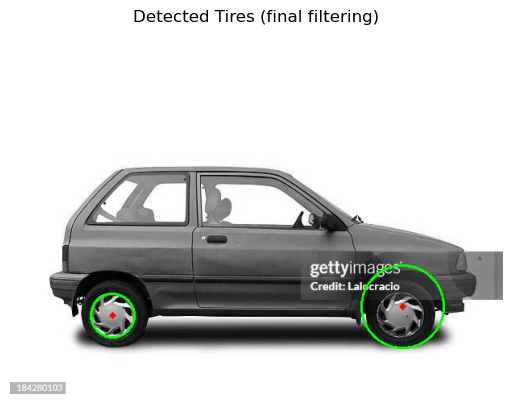

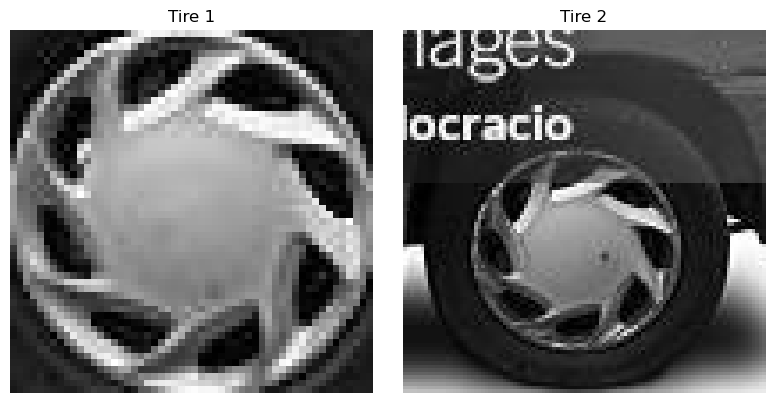

In [17]:
# Load the image
img12 = cv2.imread('auto.jpg')

# Make a copy for drawing detections (keep original intact for cropping)
output = img12.copy()

# Convert to grayscale
gray = cv2.cvtColor(img12, cv2.COLOR_BGR2GRAY)

# Apply median blur to smooth the image and reduce noise
gray_blurred = cv2.medianBlur(gray, 5)

# Detect circles using HoughCircles
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=50,
    param1=100,
    param2=30,
    minRadius=20,
    maxRadius=60
)

# List to store extracted tire patches
pneus = []

# Image dimensions
h_img, w_img = img12.shape[:2]

# Process detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i, (x, y, r) in enumerate(circles[0, :]):

        # Heuristic checks
        is_low = y > h_img * 0.6                    # circle must be in the lower area of the image
        is_size_ok = 25 < r < 60                    # radius must be within expected range
        is_not_centered = not (w_img * 0.3 < x < w_img * 0.7)  # avoid wheels in the central zone

        # Keep only valid tire candidates
        if is_low and is_size_ok and is_not_centered:

            # Draw on the *output* image (for visualization only)
            cv2.circle(output, (x, y), r, (0, 255, 0), 2)
            cv2.circle(output, (x, y), 2, (0, 0, 255), 3)

            # Crop ROI from the *original* image (no circles drawn)
            roi = img12[y - r:y + r, x - r:x + r]

            # Only save valid extracted regions
            if roi.shape[0] > 0 and roi.shape[1] > 0:
                pneus.append(roi)
                cv2.imwrite(f"pneu_{len(pneus)}.jpg", roi)

# Display the detection result (with circles)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Tires (final filtering)")
plt.axis('off')
plt.show()

# Display extracted tires (clean crops)
if pneus:
    cols = 2
    rows = (len(pneus) + 1) // cols
    plt.figure(figsize=(8, 4 * rows))

    for i, pneu in enumerate(pneus):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(pneu, cv2.COLOR_BGR2RGB))
        plt.title(f"Tire {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No tires detected.")


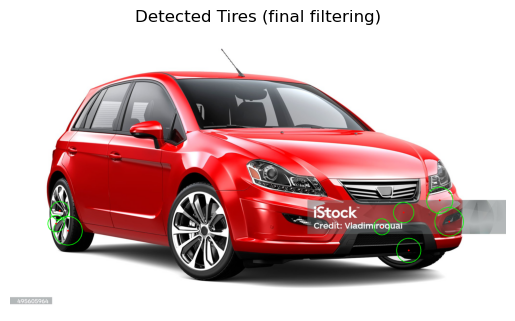

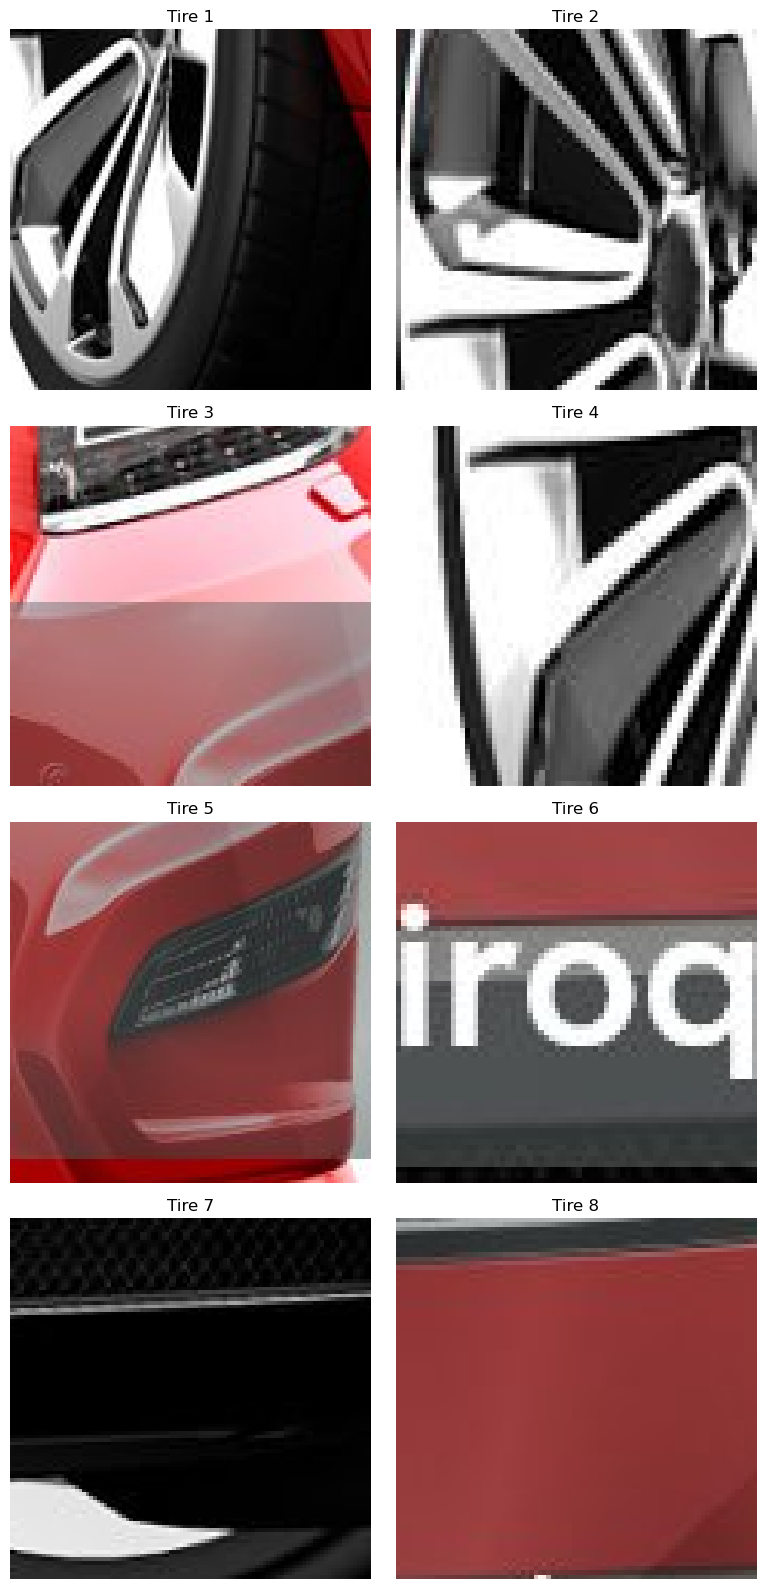

In [18]:
# Load the image
img13 = cv2.imread('auto2.jpg')

# Create a copy for drawing detections (keep original clean for cropping)
output = img13.copy()

# Convert to grayscale
gray = cv2.cvtColor(img13, cv2.COLOR_BGR2GRAY)

# Apply median blur to smooth noise while keeping edges visible
gray_blurred = cv2.medianBlur(gray, 5)

# Detect circles using the Hough Circle Transform
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=50,
    param1=100,
    param2=30,
    minRadius=20,
    maxRadius=60
)

# List to store cropped tire regions
pneus = []

# Get image dimensions
h_img, w_img = img13.shape[:2]

# Filter detected circles based on heuristics
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i, (x, y, r) in enumerate(circles[0, :]):

        # Heuristic filters
        is_low = y > h_img * 0.6              # circle should appear in lower part of the image
        is_size_ok = 25 < r < 60              # reasonable radius for a tire
        is_not_centered = not (w_img * 0.3 < x < w_img * 0.7)  # avoid central region

        # Keep only valid tire candidates
        if is_low and is_size_ok and is_not_centered:

            # Draw circle and center point on the output image (for visualization)
            cv2.circle(output, (x, y), r, (0, 255, 0), 2)
            cv2.circle(output, (x, y), 2, (0, 0, 255), 3)

            # Extract the region around the detected circle from the original image
            roi = img13[y - r:y + r, x - r:x + r]

            # Save only valid ROIs
            if roi.shape[0] > 0 and roi.shape[1] > 0:
                pneus.append(roi)
                cv2.imwrite(f"pneu_{len(pneus)}.jpg", roi)

# Display the detection result (with circles)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Tires (final filtering)")
plt.axis('off')
plt.show()

# Display extracted tires (clean crops)
if pneus:
    cols = 2
    rows = (len(pneus) + 1) // cols
    plt.figure(figsize=(8, 4 * rows))

    for i, pneu in enumerate(pneus):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(pneu, cv2.COLOR_BGR2RGB))
        plt.title(f"Tire {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No tires detected.")


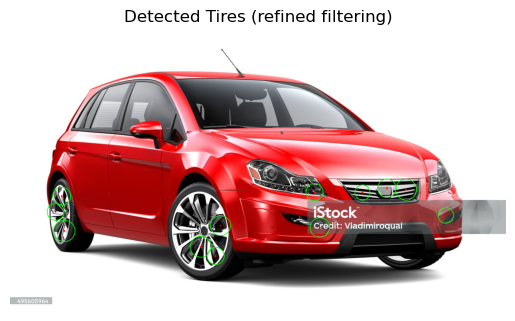

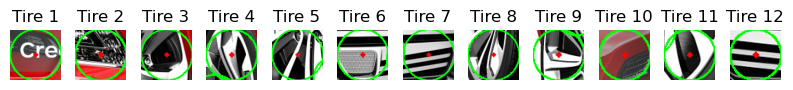

In [15]:
# Load and preprocess the image
img14 = cv2.imread('auto2.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img14, cv2.COLOR_BGR2GRAY)

# Apply median blur to reduce noise while keeping edges smooth
gray_blurred = cv2.medianBlur(gray, 5)

# Detect circles using the Hough Circle Transform
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=50,
    param1=100,
    param2=30,
    minRadius=25,
    maxRadius=50
)

# List to store extracted tire patches
pneus = []

# Image dimensions
h_img, w_img = img14.shape[:2]

# Process detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    
    for i, (x, y, r) in enumerate(circles[0, :]):

        # Refined filtering rules
        is_low = h_img * 0.55 < y < h_img * 0.95     # circle must be in lower half
        is_side = w_img * 0.05 < x < w_img * 0.95    # avoid extreme borders
        is_size_ok = 30 < r < 45                     # tighter radius constraints

        # Keep only valid tire candidates
        if is_low and is_side and is_size_ok:
            # Draw the detected circle and center
            cv2.circle(img14, (x, y), r, (0, 255, 0), 2)
            cv2.circle(img14, (x, y), 2, (0, 0, 255), 3)

            # Extract the region around the circle
            roi = img14[y - r:y + r, x - r:x + r]

            # Keep valid ROI only
            if roi.shape[0] > 0 and roi.shape[1] > 0:
                pneus.append(roi)
                cv2.imwrite(f"pneu_{len(pneus)}.jpg", roi)

# Display the detection result
plt.imshow(cv2.cvtColor(img14, cv2.COLOR_BGR2RGB))
plt.title("Detected Tires (refined filtering)")
plt.axis('off')
plt.show()

# Display cropped tire patches
if pneus:
    plt.figure(figsize=(8, 4))
    for i, pneu in enumerate(pneus):
        plt.subplot(1, len(pneus), i + 1)
        plt.imshow(cv2.cvtColor(pneu, cv2.COLOR_BGR2RGB))
        plt.title(f"Tire {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No tires detected.")


In [23]:
def is_dark_region(roi, brightness_thresh):
    """
    Check if a region of interest (ROI) is dark enough based on a brightness threshold.
    """
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    return np.mean(gray_roi) < brightness_thresh


def detect_pneus_auto_brightness(
    image_path,
    output_folder='pneus_detectes',
    zip_output=True,
    test_thresholds=[80, 100, 120, 140, 160]
):
    """
    Detect car tires using HoughCircles and an adaptive brightness threshold
    on the cropped regions. Tests several brightness thresholds and keeps
    the configuration that detects the highest number of plausible tires.
    """
    # Create output folder if it does not exist
    os.makedirs(output_folder, exist_ok=True)

    # Load image and preprocess
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blurred = cv2.medianBlur(gray, 5)
    h_img, w_img = img.shape[:2]

    # Store the best detection result across all tested thresholds
    best_result = {'count': 0, 'pneus': [], 'circles': [], 'thresh': None}

    # Try multiple brightness thresholds
    for thresh in test_thresholds:
        pneus = []
        circles = cv2.HoughCircles(
            gray_blurred,
            cv2.HOUGH_GRADIENT,
            dp=1.2,
            minDist=50,
            param1=100,
            param2=30,
            minRadius=25,
            maxRadius=50
        )

        if circles is not None:
            circles = np.uint16(np.around(circles))
            for x, y, r in circles[0, :]:
                # Geometric and positional constraints
                is_low = h_img * 0.55 < y < h_img * 0.95
                is_side = w_img * 0.05 < x < w_img * 0.95
                is_size_ok = 30 < r < 45

                if is_low and is_side and is_size_ok:
                    roi = img[y - r:y + r, x - r:x + r]

                    # Check ROI validity and darkness based on current threshold
                    if (
                        roi.shape[0] > 0
                        and roi.shape[1] > 0
                        and is_dark_region(roi, thresh)
                    ):
                        pneus.append((roi, (x, y, r)))

        # Keep the configuration that detects the highest number of tires
        if len(pneus) > best_result['count']:
            best_result = {
                'count': len(pneus),
                'pneus': pneus,
                'circles': [c[1] for c in pneus],
                'thresh': thresh
            }

    # Display the best detection result
    output = img.copy()
    for x, y, r in best_result['circles']:
        cv2.circle(output, (x, y), r, (0, 255, 0), 2)
        cv2.circle(output, (x, y), 2, (0, 0, 255), 3)

    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title(f"Pneus détectés (seuil sombre = {best_result['thresh']})")
    plt.axis('off')
    plt.show()

    # Save cropped tire patches
    for i, (roi, _) in enumerate(best_result['pneus']):
        path = os.path.join(output_folder, f"pneu_{i+1}.jpg")
        cv2.imwrite(path, roi)

    # Display thumbnails of detected tires
    if best_result['pneus']:
        plt.figure(figsize=(8, 4))
        for i, (roi, _) in enumerate(best_result['pneus']):
            plt.subplot(1, len(best_result['pneus']), i + 1)
            plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
            plt.title(f"Pneu {i+1}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print("❌ Aucun pneu détecté sur cette image.")

    # Optionally create a ZIP archive with all extracted tires
    if zip_output and best_result['pneus']:
        zip_path = output_folder + '.zip'
        with zipfile.ZipFile(zip_path, 'w') as zipf:
            for f in os.listdir(output_folder):
                zipf.write(os.path.join(output_folder, f), arcname=f)
        print(f"✅ Archive ZIP créée : {zip_path}")


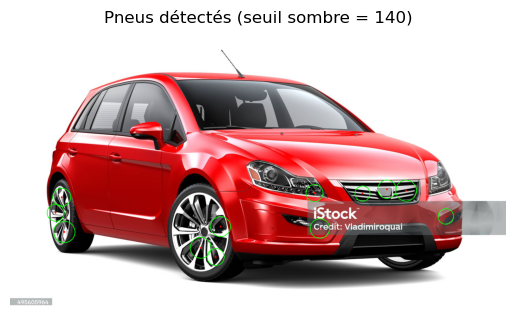

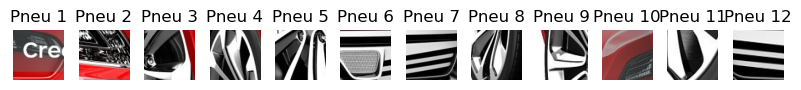

✅ Archive ZIP créée : pneus_detectes.zip


In [24]:
detect_pneus_auto_brightness('auto2.jpg')

In [16]:
def is_dark_region(roi, brightness_thresh):
    """
    Check if a region of interest (ROI) is dark enough based on a brightness threshold.
    The brightness is computed as the mean intensity of the grayscale ROI.
    """
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    return np.mean(gray_roi) < brightness_thresh


def is_circular_shape(roi, min_circularity=0.7):
    """
    Estimate whether a region of interest (ROI) has a roughly circular shape.
    Circularity is computed as:
        circularity = 4π * area / perimeter²
    A perfect circle has a circularity close to 1.0.
    """
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If no contour is found, we cannot estimate circularity
    if not contours:
        return False

    # Use the largest contour as the main shape
    cnt = max(contours, key=cv2.contourArea)
    perimeter = cv2.arcLength(cnt, True)
    area = cv2.contourArea(cnt)

    if perimeter == 0:
        return False

    circularity = 4 * np.pi * area / (perimeter * perimeter)
    return circularity >= min_circularity


def detect_pneus_auto_brightness(
    image_path,
    output_folder='pneus_detectes',
    zip_output=True,
    test_thresholds=[80, 100, 120, 140, 160]
):
    """
    Detect car tires using HoughCircles combined with:
      - multiple brightness thresholds on the cropped ROIs (darkness check),
      - a circularity constraint on the ROI shape.
    The function tests several brightness thresholds and keeps the configuration
    that detects the largest number of plausible tires.
    """
    # Ensure output directory exists
    os.makedirs(output_folder, exist_ok=True)

    # Load and preprocess image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blurred = cv2.medianBlur(gray, 5)
    h_img, w_img = img.shape[:2]

    # Store the best configuration across all tested brightness thresholds
    best_result = {'count': 0, 'pneus': [], 'circles': [], 'thresh': None}

    # Try multiple brightness thresholds
    for thresh in test_thresholds:
        pneus = []

        # Detect candidate circles once per threshold set
        circles = cv2.HoughCircles(
            gray_blurred,
            cv2.HOUGH_GRADIENT,
            dp=1.2,
            minDist=50,
            param1=100,
            param2=30,
            minRadius=25,
            maxRadius=50
        )

        if circles is not None:
            circles = np.uint16(np.around(circles))
            for x, y, r in circles[0, :]:
                # Geometric and positional constraints
                is_low = h_img * 0.55 < y < h_img * 0.95
                is_side = w_img * 0.05 < x < w_img * 0.95
                is_size_ok = 30 < r < 45

                if is_low and is_side and is_size_ok:
                    # Extract square ROI around the circle
                    roi = img[y - r:y + r, x - r:x + r]

                    # Only process valid ROIs
                    if roi.shape[0] > 0 and roi.shape[1] > 0:
                        # Check darkness and circularity constraints
                        if is_dark_region(roi, thresh) and is_circular_shape(roi):
                            pneus.append((roi, (x, y, r)))

        # Keep the configuration with the highest number of detected tires
        if len(pneus) > best_result['count']:
            best_result = {
                'count': len(pneus),
                'pneus': pneus,
                'circles': [c[1] for c in pneus],
                'thresh': thresh
            }

    # Visual display of the best result
    output = img.copy()
    for x, y, r in best_result['circles']:
        cv2.circle(output, (x, y), r, (0, 255, 0), 2)
        cv2.circle(output, (x, y), 2, (0, 0, 255), 3)

    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title(f"Pneus détectés (seuil sombre = {best_result['thresh']})")
    plt.axis('off')
    plt.show()

    # Save each detected tire crop
    for i, (roi, _) in enumerate(best_result['pneus']):
        path = os.path.join(output_folder, f"pneu_{i+1}.jpg")
        cv2.imwrite(path, roi)

    # Display thumbnails of detected tires
    if best_result['pneus']:
        plt.figure(figsize=(8, 4))
        for i, (roi, _) in enumerate(best_result['pneus']):
            plt.subplot(1, len(best_result['pneus']), i + 1)
            plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
            plt.title(f"Pneu {i+1}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print("❌ Aucun pneu détecté sur cette image.")

    # Optionally create a ZIP archive with all extracted tires
    if zip_output and best_result['pneus']:
        zip_path = output_folder + '.zip'
        with zipfile.ZipFile(zip_path, 'w') as zipf:
            for f in os.listdir(output_folder):
                zipf.write(os.path.join(output_folder, f), arcname=f)
        print(f"✅ Archive ZIP créée : {zip_path}")


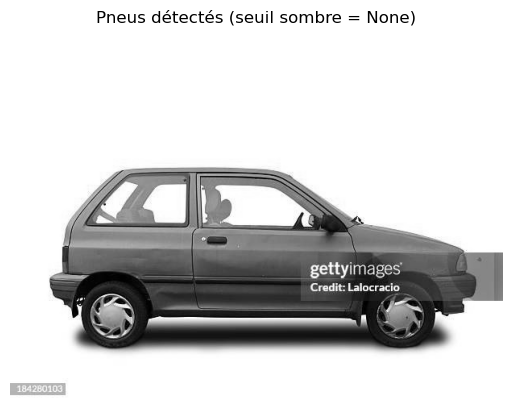

❌ Aucun pneu détecté sur cette image.


: 

In [ ]:
detect_pneus_auto_brightness('auto.jpg')
